<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Estadistica Descriptiva

⚠️ Siempre que puedas usa graficas para apoyar tu interpretacion


In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np  
import pandas as pd 


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# librerias para estadisticas 
# ------------------------------------------------------------------------------

import statistics as st 
from scipy import stats  
from scipy.stats import skew,kurtosis # libreria para asimetria y curtosis 


#### Ejercicio 1: 

1.  Dados los siguientes datos: [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]. Crea una funcion que calcule la media, mediana y moda.


In [2]:
datos = [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]

def media(data):
    return sum(data)/len(data)

def mediana(data):
    ordenado = sorted(data)
    l = len(ordenado)
    if l%2 == 0:
        i = l/2
        return (ordenado[int(l/2)] + ordenado[int(l/2)+1])/2
    else:
        return ordenado[int(l/2+1)]

def moda(data):
    counts = {}
    for i in data:
        if i in counts:
            counts[i] += 1
        else:
            counts[i] = 1
    max_count = max(counts.values())
    mode = [key for key, count in counts.items() if count == max_count]

    return mode[0] if len(mode) == 1 else mode

def calculos(data):
    return {'media' : media(data), 'mediana' : mediana(data), 'moda' : moda(data)}

print(calculos(datos))

{'media': 38.8, 'mediana': 47.5, 'moda': 50}


2.	Interpretación de la media: ¿Qué sucede si un valor extremo, como 100, se agrega al conjunto de datos anterior? ¿Cómo cambia la media? Explica por qué sucede esto.

In [3]:
datos.append(100)

In [4]:
datos
print(f'Media: {media(datos)}')

Media: 44.36363636363637


Esto ocurre porque la media es muy susceptible a valores atípicos. Al ser una medida que toma en cuenta la suma de todos los valores, una vez introducido un valor muy superior o muy inferior, éste hace que la media cambie bruscamente. Esto lo podemos ver si introducimos un valor exageradamente alto (o bajo):

- [1,2,3,4,5] --> media = (1+2+3+4+5)/5 = 15/5 = 3
- [1,2,3,4,5,100] --> media = (1+2+3+4+5+100)/6 = 115/6 = 19.1667
- [1,2,3,4,5,-30] --> media = (1+2+3+4+5-30)/6 = -15/6 = -2.5

Por eso una medida mucho más robusta para situaciones como éstas es la mediana:

In [5]:
mediana(datos)

50

Ya que esta no es un cálculo en base a los valores, sino a su posición en la secuencia ordenada.


#### Ejercicio 2: 
1. **Cálculo de la varianza y desviación estándar**: Usando los mismos datos de arriba, calcula la **varianza** y la **desviación estándar**.




In [6]:
datos = [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]

def desv_est(data):
    return (sum([(a-media(data))**2 for a in data])/len(data))**(1/2)

def varianza(data):
    return desv_est(data)**2

print(f'Desviación estándar: {desv_est(datos)}')
print(f'Varianza: {varianza(datos)}')

Desviación estándar: 14.613692209705253
Varianza: 213.56


2. **Comparación de dispersión**: Dado otro conjunto de datos: `[18, 19, 20, 22, 24, 25, 27, 30]`, compara la **dispersión** de este grupo con el conjunto de datos anterior (del Ejercicio 1) calculando la **desviación estándar** de ambos. ¿Qué conjunto tiene mayor dispersión?

In [7]:
datos2 = [18, 19, 20, 22, 24, 25, 27, 30]
print(f'Desviación estándar 1: {desv_est(datos)}')
print(f'Desviación estándar 2: {desv_est(datos2)}')

Desviación estándar 1: 14.613692209705253
Desviación estándar 2: 3.887077951366553


El primer conjunto de datos presenta significativamente mayor dispersión de los datos.

#### Ejercicio 3:

1. Usa la función correspondiente en Python para calcular la **asimetría** del conjunto de datos: `[10, 20, 20, 20, 25, 30, 35, 40]`. 


In [8]:
datos3 = [10, 20, 20, 20, 25, 30, 35, 40]

Podemos comprobar la asimetría con un cálculo rápido:

In [9]:
def asimetria(data):
    sk = skew(data)
    if sk > 0:
        print(f'Asimetría: {sk}, a la derecha')
    elif sk < 0:
        print(f'Asimetría: {sk}, a la izquierda')
    else:
        print(f'Perfectamente simétrico, {sk}')

asimetria(datos3)

Asimetría: 0.1280077375904375, a la derecha


2. Interpreta el resultado: ¿El conjunto es simétrico, sesgado a la izquierda o a la derecha?

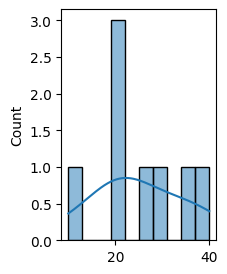

In [10]:
plt.figure(figsize=(2,3))
sns.histplot(datos3, bins = 10, kde=True)
plt.show()

Vemos, como indica el cálculo, una ligera asimetría a la derecha.

#### Ejercicio 4: 

1. Calcula la **curtosis** para el conjunto de datos: `[5, 5, 5, 20, 25, 30, 30, 50]`. 

In [11]:
datos4 = [5, 5, 5, 20, 25, 30, 30, 50]

In [12]:
def curtosis(data):
    kt = kurtosis(data)
    if kt > 0:
        print(f'Curtosis: {kt}, leptocúrtico')
    elif kt < 0:
        print(f'Curtosis: {kt}, platocúrtico')
    else:
        print(f'Mesocúrtico, {kt}')

curtosis(datos4)

Curtosis: -0.7357817008166658, platocúrtico


2. ¿El conjunto tiene una curtosis positiva, negativa o es mesocúrtico? Explica qué implica esto sobre la forma de la distribución.

Tiene una curtosis negativa, por lo que será platocúrtica:

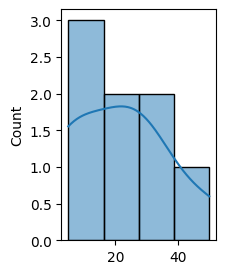

In [13]:
plt.figure(figsize=(2,3))
sns.histplot(datos4, kde=True)
plt.show()

Se ve una distribución bastante aplanada, lo cual confirma nuestro cálculo. Los valores estarán más dispersos y tendrán frecuencias más similares (forma aplanada del histograma).

#### Ejercicio 5: Caso practico. 


Imagina que una empresa está evaluando el rendimiento de sus empleados para entender la relación entre el tiempo que dedican a su trabajo y el éxito que tienen en términos de ventas. La empresa recopila datos durante un mes, midiendo cuántas **horas trabajó** cada empleado y cuántas **ventas realizaron**. Estos datosa se encuentran en el archivo `rendimiento.csv`

**Horas trabajadas**: 
   - Se midieron las horas trabajadas por un grupo de empleados. En general, la mayoría de los empleados trabajan entre 40 y 60 horas a la semana, con algunos empleados trabajando un poco menos o más.


**Ventas realizadas**:
   - A cada empleado también se le hizo un seguimiento de cuántas ventas realizó. Aunque las ventas están influenciadas por las horas trabajadas, hay cierta **variabilidad**: algunos empleados pueden ser más productivos y vender más en menos tiempo, mientras que otros necesitan trabajar más para alcanzar los mismos resultados.


Resuelve los siguientes puntos:



1. **Cálculo de la media, mediana y moda**:
   - Calcula la **media**, **mediana** y **moda** de las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - Explica qué información proporciona cada medida en este contexto. Justifica tus conclusiones con representación de graficas. 


In [14]:
df = pd.read_csv("datos/rendimiento.csv", index_col=0)
horas = df["Horas Trabajadas"]
ventas = df["Ventas Realizadas"]

Lo primero de todo es comprobar los valores únicos en las columnas numéricas, ya que no tendría mucho sentido calcular la media para aquellas donde todos los valores sean diferentes (no categóricas).

In [15]:
print(f"Ventas : De los {len(ventas)} valores únicos hay {len(ventas.unique())} diferentes")
print(f"Horas : De los {len(horas)} valores únicos hay {len(horas.unique())} diferentes")

Ventas : De los 100 valores únicos hay 36 diferentes
Horas : De los 100 valores únicos hay 100 diferentes


Para las horas no tiene sentido calcular la moda. Para las ventas el significado de la moda será el número de ventas más frecuente, por lo que estaríamos categorizando.

In [16]:
print(f'Ventas: {calculos(ventas)}')
print(f'Horas: {calculos(horas)}')

Ventas: {'media': 49.12, 'mediana': 48.5, 'moda': 47.0}
Horas: {'media': 48.96153482605906, 'mediana': 49.06170798015713, 'moda': [54.96714153011233, 48.61735698828815, 56.47688538100692, 65.23029856408026, 47.65846625276664, 47.6586304305082, 65.79212815507391, 57.67434729152909, 45.30525614065048, 55.42560043585965, 45.365823071875376, 45.34270246429743, 52.41962271566034, 30.86719755342202, 32.75082167486967, 44.37712470759028, 39.87168879665576, 53.142473325952736, 40.91975924478789, 35.87696298664709, 64.65648768921554, 47.74223699513465, 50.67528204687924, 35.75251813786543, 44.556172754748175, 51.10922589709866, 38.49006422577697, 53.75698018345672, 43.99361310081195, 47.08306250206724, 43.98293387770603, 68.52278184508938, 49.86502775262066, 39.422890710441, 58.22544912103189, 37.791563500289776, 52.08863595004755, 30.403298761202244, 36.71813951101569, 51.96861235869123, 57.38466579995411, 51.7136828118997, 48.8435171761176, 46.98896304410711, 35.214780096325725, 42.8015579160

Vemo cómo no tiene sentido la moda en las horas trabajadas.

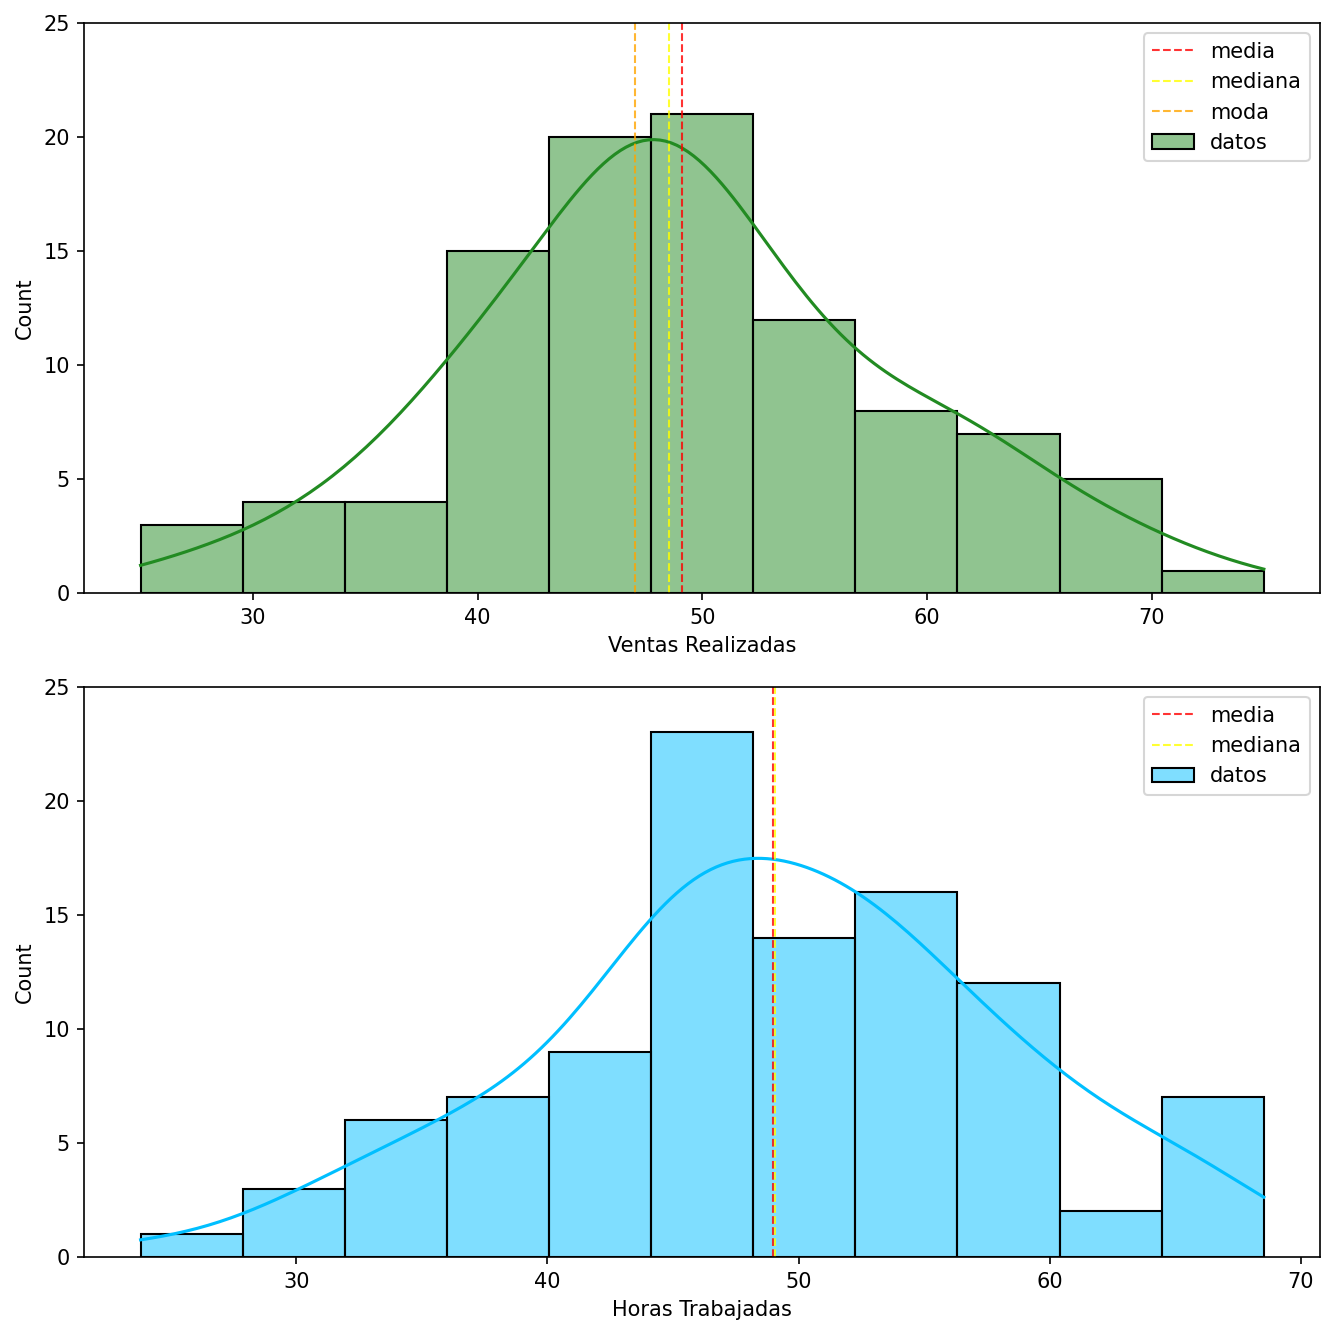

In [17]:
fig, axes = plt.subplots(2, 1, figsize = (9,9), dpi = 150)
sns.histplot(ventas, kde=True, color = "forestgreen", label = "datos", ax=axes[0])
axes[0].vlines(x = media(ventas), ymin = 0, ymax = 30,
           colors="red", ls = "--", lw = 1, alpha = 0.8, label="media")
axes[0].vlines(x = mediana(ventas), ymin = 0, ymax = 30,
           colors="yellow", ls = "--", lw = 1, alpha = 0.8, label="mediana")
axes[0].vlines(x = moda(ventas), ymin = 0, ymax = 30,
           colors="orange", ls = "--", lw = 1, alpha = 0.8, label="moda")
axes[0].set_ylim(0,25)
axes[0].legend()

sns.histplot(horas, kde=True, color = "deepskyblue", label = "datos", ax=axes[1])
axes[1].vlines(x = media(horas), ymin = 0, ymax = 30,
           colors="red", ls = "--", lw = 1, alpha = 0.8, label="media")
axes[1].vlines(x = mediana(horas), ymin = 0, ymax = 30,
           colors="yellow", ls = "--", lw = 1, alpha = 0.8, label="mediana")
axes[1].set_ylim(0,25)
axes[1].legend()
plt.tight_layout()
plt.show()

La media indica la cantidad promedio de ventas realizadas y horas trabajadas en el período de análisis, mientras que la mediana de cada cantidad indican el valor desde el cual parten el 50% de los datos, por encima y por debajo.


2. **Comparación de medidas de centralización**:
   - ¿Cómo se diferencian la media y la mediana para los datos de **Ventas Realizadas**? ¿Qué indica esta diferencia sobre la distribución de las ventas?


In [18]:
media(ventas)-mediana(ventas)

0.6199999999999974

Siendo la diferencia entre media y mediana positiva, es decir, media > mediana, indica que hay más valores de las ventas que son excepcionalmente altas que el resto. El hecho de que este valor sea solo ligeramente positivo indica que no hay demasiados outliers.

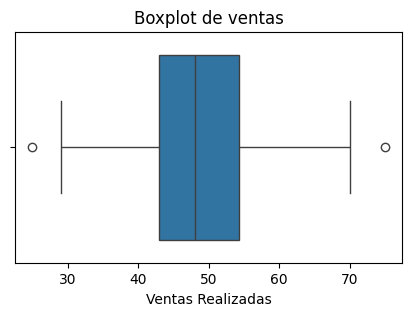

In [19]:
plt.figure(figsize=(5,3))
plt.title("Boxplot de ventas")
sns.boxplot(x = ventas)
plt.show()

3. **Cálculo de la varianza y desviación estándar**:
   - Calcula la **varianza** y la **desviación estándar** para las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - ¿Qué conjunto de datos es más disperso? Explica el significado de la dispersión en este caso. Justifica tus conclusiones con representación de graficas. 


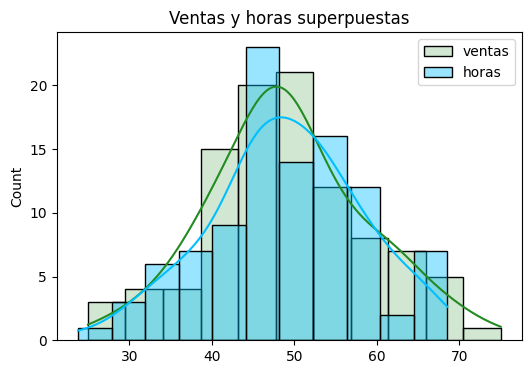

In [20]:
plt.figure(figsize=(6,4))
plt.title("Ventas y horas superpuestas")
sns.histplot(ventas, kde=True, color = "forestgreen", label = "ventas", alpha = 0.2)
sns.histplot(horas, kde=True, color = "deepskyblue", label = "horas", alpha = 0.4)
plt.xlabel(None)
plt.legend()
plt.show()

Viendo las distribuciones superpuestas, podríamos deducir que la desviación estándas (y por ende la varianza) de las ventas es mayor a la de las horas. Podemos comprobar esto calculando:

In [21]:
print(f"Ventas -- Std: {desv_est(ventas)}, Var: {varianza(ventas)}")
print(f"Horas -- Std: {desv_est(horas)}, Var: {varianza(horas)}")

Ventas -- Std: 9.598208166111007, Var: 92.12560000000002
Horas -- Std: 9.036161766446297, Var: 81.65221946938586


4. **Rango y rango intercuartílico**:
   - Calcula el **rango** y el **rango intercuartílico** para ambas columnas. 
   - ¿Qué te dice esto sobre la variabilidad de los datos? Justifica tus conclusiones con representación de graficas. 

In [22]:
def iqr(data):
    q1,q3 = np.quantile(a=data, q = [0.25,0.75])
    return q3-q1

def rango(data):
    return max(data)-min(data)

print(f"Ventas -- Rango: {rango(ventas)}, IQR: {iqr(ventas)}")
print(f"Horas -- Rango: {rango(horas)}, IQR: {iqr(horas)}")

Ventas -- Rango: 50.0, IQR: 11.25
Horas -- Rango: 44.72023288598683, IQR: 10.06857722508515


Las ventas presentan un mayor rango e IQR, lo cual indica que contiene datos más dispersos que las horas, ya que el rango es la ventana donde se encuentran los datos y el IQR la ventana que contiene datos desde el Q1 hasta el Q3 (25%-75%). Esto se ve perfectamente en un boxplot:

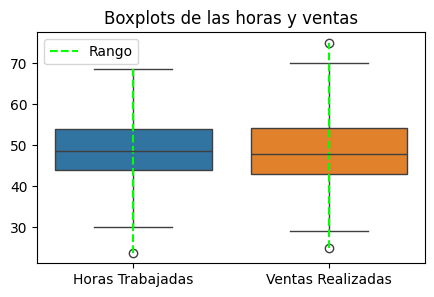

In [23]:
plt.figure(figsize=(5,3))
plt.title("Boxplots de las horas y ventas")
sns.boxplot(data = df)
plt.vlines(x = ["Horas Trabajadas"], ymin=min(horas), ymax = max(horas), ls = "--", colors = "lime", label = "Rango")
plt.vlines(x = ["Ventas Realizadas"], ymin=min(ventas), ymax = max(ventas), ls = "--", colors = "lime")
plt.legend()
plt.show()

El box del boxplot representa el IQR, el cual es efectivamente más grande en las ventas que en las horas. En nuestro gráfico además se han incluido líneas verdes que representan el rango, el cual es también mayor en las ventas que en las horas.

5. **Cálculo de la asimetría**:
   - Usa la función adecuada en Python para calcular la **asimetría** de los datos de **Horas Trabajadas** y **Ventas Realizadas**. 
   - Interpreta si el conjunto de datos es **simétrico**, **sesgado a la izquierda** o **sesgado a la derecha**.

Asimetría: 0.18139072143833262, a la derecha


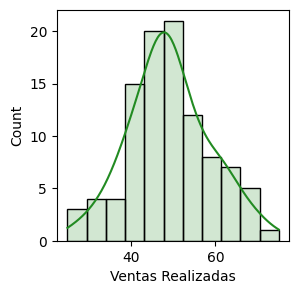

In [24]:
f'{asimetria(ventas)}'
plt.figure(figsize=(3,3))
sns.histplot(ventas, kde=True, color = "forestgreen", label = "ventas", alpha = 0.2)
plt.show()

Vemos que el cálculo es consistente con la representación gráfica obtenida, la distribución es ligeramente asimétrica a la derecha, teniendo una cola más larga en esta dirección.

Asimetría: -0.17526772024434056, a la izquierda


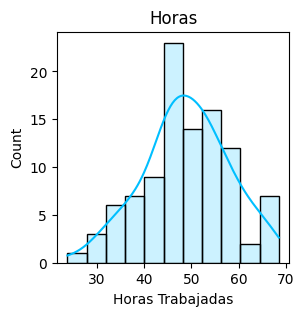

In [25]:
f'{asimetria(horas)}'
plt.figure(figsize=(3,3))
plt.title("Horas")
sns.histplot(horas, kde=True, color = "deepskyblue", label = "ventas", alpha = 0.2)
plt.show()

También vemos que el cálculo es consistente con la representación gráfica obtenida, esta vez mucho más claro, la distribución es asimétrica a la izquierda, teniendo una cola más larga en esta dirección.

6. **Cálculo de la curtosis**:
   - Calcula la **curtosis** para ambos conjuntos de datos. ¿Los conjuntos tienen una curtosis positiva, negativa o son mesocúrticos? 
   - Explica qué implica esto sobre la forma de la distribución.

En cuanto a la curtosis, en la gráfica no se aprecia muy bien el signo de esta, pero podemos calcularla:

In [102]:
curtosis(ventas)

Curtosis: 0.013598589847180875, leptocúrtico


Las ventas realizadas presentan una distribución leptocúrtica, lo que indica una forma más apuntada, por lo que los valores de la distribución están más concentrados en un intervalo menor.

In [27]:
curtosis(horas)

Curtosis: -0.15540470774207948, platocúrtico


En cuanto a las horas, su distribución es de tipo platocúrtica, de una forma más aplanada, por lo que los valores están más dispersos.

7. **Gráfico de dispersión**:
   - Crea un **gráfico de dispersión** entre **Horas Trabajadas** y **Ventas Realizadas**. 
   - ¿Hay alguna correlación entre ambas variables? Explica cómo interpretar la relación entre las dos variables.

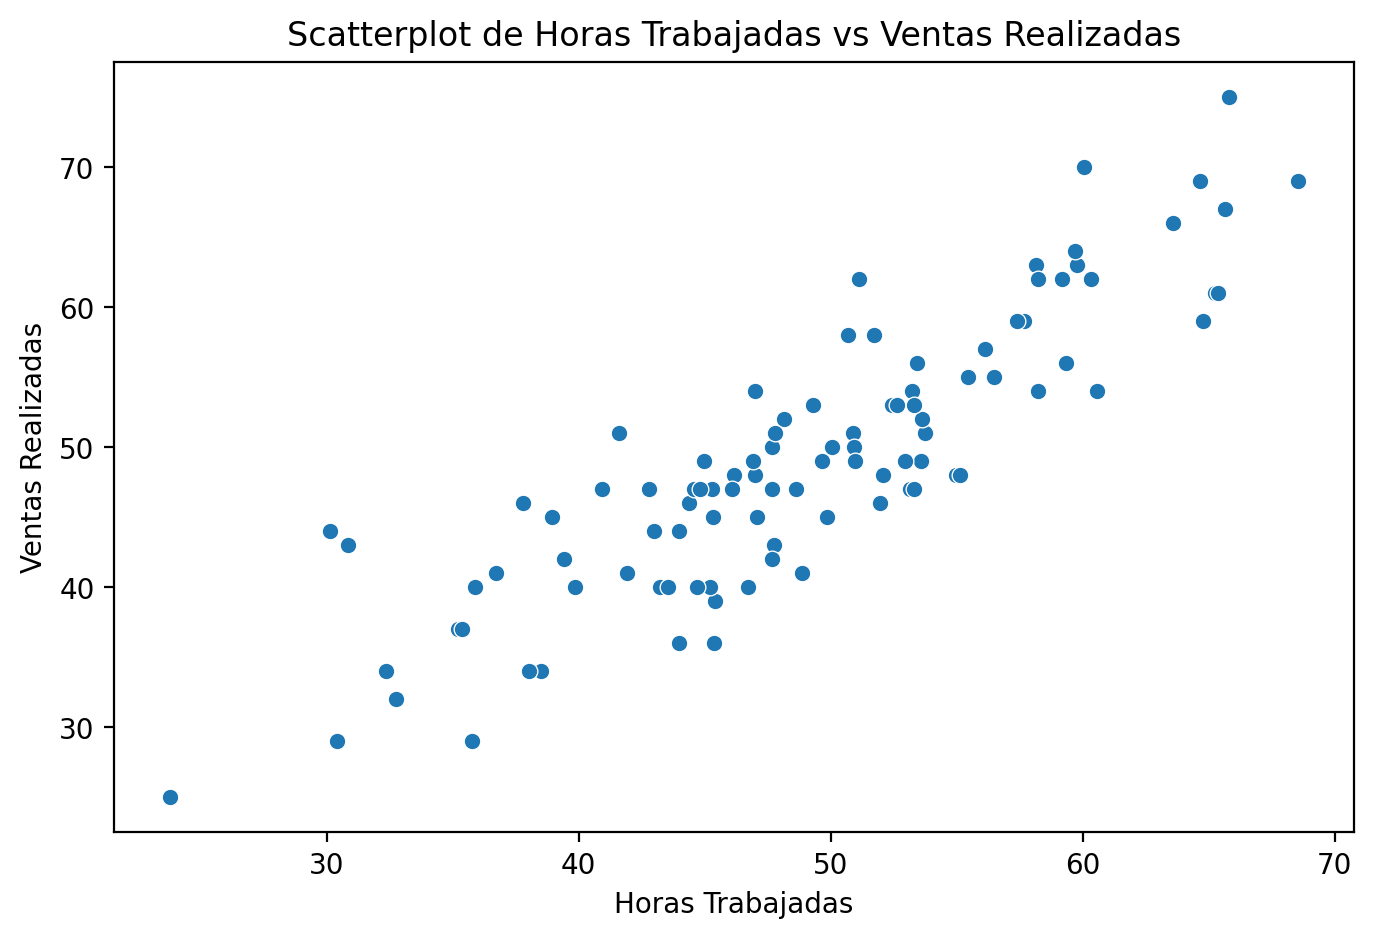

In [28]:
plt.figure(figsize=(8,5), dpi = 200)
plt.title("Scatterplot de Horas Trabajadas vs Ventas Realizadas")
sns.scatterplot(data = df, x = "Horas Trabajadas", y = "Ventas Realizadas")
plt.show()

Vemos una clara correlación entre ambas variables. Esta correlación la podemos comprobar calculando la covarianza (para la dirección de la correlación) y el coeficiente de correlación (para la dirección y magnitud de la correlación).

In [29]:
print(f"Covarianza = {st.covariance(horas, ventas)}")
print(f"Correlación = {st.correlation(horas, ventas)}")

Covarianza = 76.27133896411252
Correlación = 0.8706074985434327


Realmente con el coeficiente de correlación no es necesaria la covarianza, ya que esta nos da la información de dirección y magnitud de la correlación. Con esto vemos que tenemos una dependencia positiva muy fuerte, como se observa en el plot de dispersión generado arriba.

Esta correlación tiene sentido, ya que es coherente pensar que a cuantas más horas trabajadas, más ventas se realizan, por lo que es una relación tanto correlacional como causal.

8. **Análisis exploratorio completo**:
   - Realiza un análisis exploratorio detallado de los datos, incluyendo todas las medidas calculadas en los ejercicios anteriores. Presenta los resultados en forma de un informe claro y visual con gráficos y tablas que resuman las características clave de los datos.




Usando un describe podemos obtener las métricas que hemos calculado previamente en un formato más compacto.

In [94]:
df.describe()

,Horas Trabajadas,Ventas Realizadas
count,100.000000,100.000000
mean,48.961535,49.120000
std,9.081684,9.646562
min,23.802549,25.000000
25%,43.990943,43.000000
50%,48.730437,48.000000
75%,54.059521,54.250000
max,68.522782,75.000000


Podemos completar calculando de nuevo el iqr y el rango:

In [97]:
print(f"Ventas -- Rango: {rango(ventas)}, IQR: {iqr(ventas)}")
print(f"Horas -- Rango: {rango(horas)}, IQR: {iqr(horas)}")

Ventas -- Rango: 50.0, IQR: 11.25
Horas -- Rango: 44.72023288598683, IQR: 10.06857722508515


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

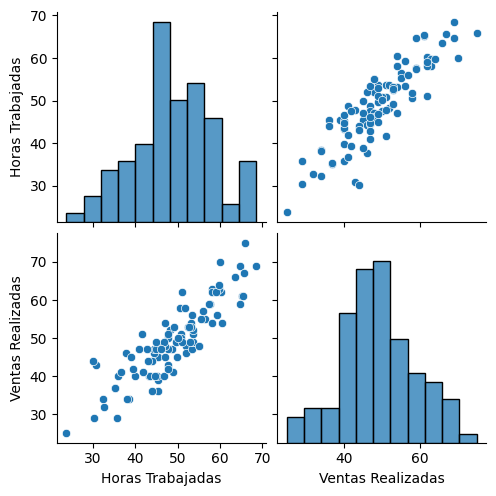

In [100]:
plt.figure(figsize=(12, 6))
sns.pairplot(df)
plt.show()

Usando el pairplot también podemos deducir métricas como la asimetría, curtosis y correlación de las variables, todo ello en un mismo gráfico.